# Core question

##### How is political bias distributed across U.S. news outlets according to AllSides, and how strongly does the public agree or disagree with these bias ratings? How are news outlets clustered based on their ideology, public perception of bias, and engagement levels?


# Load and inspect data

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.getcwd()

'/Users/shankernarayan/Documents/Project_Datasets/news_outlet_bias'

In [209]:
outlet_data = pd.read_csv('/Users/shankernarayan/Documents/Project_Datasets/news_outlet_bias/allsides/allsides.csv')
outlet_data.head()

,name,bias,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page
0,ABC News (Online),left-center,53210,35301,17909,1.971132,Agrees,https://www.allsides.com/news-source/abc-news-...
1,Above The Law,left-center,405,266,139,1.913669,Agrees,https://www.allsides.com/news-source/above-law...
2,Abridge News,allsides,649,395,254,1.555118,Agrees,https://www.allsides.com/news-source/abridge-n...
3,AJ+,left,811,607,204,2.975490,Strongly Agrees,https://www.allsides.com/news-source/aj-media-...
4,Al Jazeera,left-center,12258,4889,7369,0.663455,Disagrees,https://www.allsides.com/news-source/al-jazeer...


##### 442 rows x 8 columns

In [210]:
outlet_data.shape

(442, 8)

In [211]:
outlet_data.describe()

,total_votes,agree,disagree,agree_ratio
count,442.000000,442.000000,442.000000,442.000000
mean,5175.343891,3024.061086,2151.285068,1.366611
std,14742.131389,8372.766040,6687.102635,0.829768
min,1.000000,1.000000,1.000000,0.176724
25%,210.250000,115.500000,99.250000,0.869924
50%,684.000000,326.500000,311.500000,1.109122
75%,1771.250000,1002.500000,770.500000,1.621232
max,179490.000000,99383.000000,80107.000000,6.757684


In [212]:
outlet_data.count()

name              442
bias              442
total_votes       442
agree             442
disagree          442
agree_ratio       442
agreeance_text    442
allsides_page     442
dtype: int64

##### No null values

In [213]:
outlet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            442 non-null    object 
 1   bias            442 non-null    object 
 2   total_votes     442 non-null    int64  
 3   agree           442 non-null    int64  
 4   disagree        442 non-null    int64  
 5   agree_ratio     442 non-null    float64
 6   agreeance_text  442 non-null    object 
 7   allsides_page   442 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 27.8+ KB


##### I'll want to transform bias ratings into numeric values later, so I need to filter out all rows from 'outlet_data' where bias is labelled as 'allsides'. I can't translate that into a numeric value, and it accounts for less than 3% of the rows in my table, so makes sense to exclude

In [214]:
outlet_data["bias"].value_counts()

bias
center          167
left-center      96
left             66
right            53
right-center     47
allsides         13
Name: count, dtype: int64

In [215]:
outlet_data = outlet_data[outlet_data["bias"] != "allsides"]
outlet_data = outlet_data.reset_index(drop=True)
outlet_data["bias"].value_counts()

bias
center          167
left-center      96
left             66
right            53
right-center     47
Name: count, dtype: int64

##### Removed 13 rows from dataset

In [216]:
outlet_data.shape

(429, 8)

##### 9 clean, distinct labels for 'agreeance_text'

In [217]:
outlet_data["agreeance_text"].value_counts().sort_values()

agreeance_text
Absolutely Disagrees      2
Neutral                   4
Strongly Disagrees       13
Absolutely Agrees        22
Disagrees                30
Strongly Agrees          48
Agrees                   51
Somewhat Agrees         125
Somewhat Disagrees      134
Name: count, dtype: int64

# Transform bias ratings into numerical scale

In [218]:
bias_dict = {'left': -2,
             'left-center': -1,
             'center': 0,
             'right-center': 1,
             'right': 2}

In [219]:
outlet_data['bias_score'] = outlet_data['bias'].replace(bias_dict)
outlet_data.head()

,name,bias,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page,bias_score
0,ABC News (Online),left-center,53210,35301,17909,1.971132,Agrees,https://www.allsides.com/news-source/abc-news-...,-1
1,Above The Law,left-center,405,266,139,1.913669,Agrees,https://www.allsides.com/news-source/above-law...,-1
2,AJ+,left,811,607,204,2.975490,Strongly Agrees,https://www.allsides.com/news-source/aj-media-...,-2
3,Al Jazeera,left-center,12258,4889,7369,0.663455,Disagrees,https://www.allsides.com/news-source/al-jazeer...,-1
4,AlterNet,left,16591,13639,2952,4.620257,Absolutely Agrees,https://www.allsides.com/news-source/alternet-...,-2


# Distribution of bias ratings

In [220]:
distribution = (outlet_data
                .groupby(['bias_score', 'bias'])
                .size()
                .sort_index()
                .reset_index(name="count"))

In [221]:
distribution['proportion'] = distribution['count']/distribution['count'].sum()

In [222]:
distribution

,bias_score,bias,count,proportion
0,-2,left,66,0.153846
1,-1,left-center,96,0.223776
2,0,center,167,0.389277
3,1,right-center,47,0.109557
4,2,right,53,0.123543


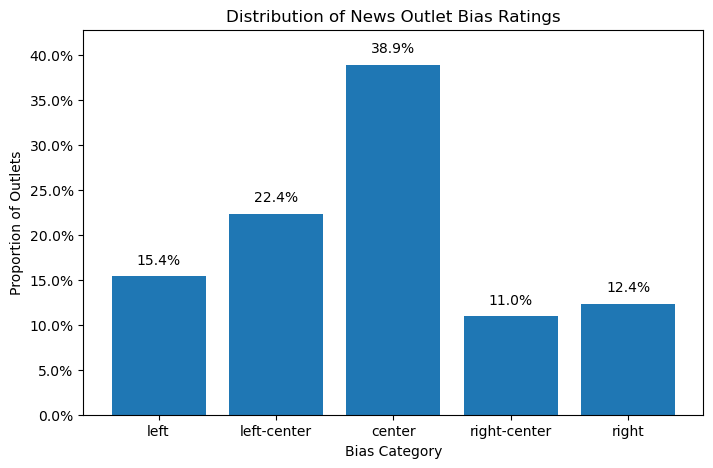

In [223]:
distribution['bias'] = pd.Categorical(
    distribution['bias'],
    categories=distribution['bias'],   # preserves the current order
    ordered=True
)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(distribution['bias'], distribution['proportion'] * 100)

plt.xlabel('Bias Category')
plt.ylabel('Proportion of Outlets')
plt.title('Distribution of News Outlet Bias Ratings')

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylim(0, distribution['proportion'].max() * 100 * 1.1)  # optional padding

for bar, pct in zip(bars, distribution['proportion'] * 100):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
        height + 1,                         # y position (just above bar)
        f"{pct:.1f}%",                      # label text
        ha='center', va='bottom', fontsize=10
    )

plt.show()

# Cluster Analysis

##### Retain originai bias labels for future visualization

In [224]:
bias_mapping = pd.DataFrame(
    list(bias_dict.items()),
    columns=["bias_label", "bias_score"]
)

bias_mapping

,bias_label,bias_score
0,left,-2
1,left-center,-1
2,center,0
3,right-center,1
4,right,2


### Prepare and validate model
Create a new dataframe, 'outlet_model', which contains the outlet name and relevant numeric data. Taking the log of 'total_votes' and 'agree_ratio' reduces the impact of extreme outliers in those columns

In [235]:
outlet_data.head()
outlet_model = (outlet_data[["name", "bias_score", "agree_ratio", "total_votes"]]).copy()
outlet_model["total_votes"] = np.log(outlet_model["total_votes"])
outlet_model["agree_ratio"] = np.log(outlet_model["agree_ratio"])
outlet_model.rename(columns={'agree_ratio': 'agree_ratio_log', 'total_votes': 'total_votes_log'}, inplace=True)
outlet_model.head()

,name,bias_score,agree_ratio_log,total_votes_log
0,ABC News (Online),-1,0.678608,10.882002
1,Above The Law,-1,0.649022,6.003887
2,AJ+,-2,1.090409,6.698268
3,Al Jazeera,-1,-0.410294,9.413934
4,AlterNet,-2,1.530450,9.716616


### Why I chose to focus on these three features

##### bias_score 
Captures each outlet’s position on the political spectrum. This feature helps the model form clusters based on ideological leaning, which is a primary axis along which news outlets differ.

##### agree_ratio (log)
Represents the level of public agreement with each outlet’s perceived bias. This adds a separate dimension of audience consensus or trust, helping differentiate outlets that share similar political leanings but receive different public responses.

##### total_votes (log, not raw votes)
Using the raw vote counts would heavily skew the feature space, but applying a log transform reduces that skew while still capturing the distinction between large mainstream outlets and smaller or niche sources

### Scaling features

##### We want to scale our features so that each is equally considered during clustering. Without scaling, our clusters would be dominated by features with wide variation (i.e. log_total_votes has a wider range than bias_score (-2 to 2)). To scale our features, we'll be using StandardScaler

In [241]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [249]:
numeric_cols = ['bias_score', 'agree_ratio_log', 'total_votes_log'] #only numeric columns can be scaled

outlet_model_scaled = pd.DataFrame(
    scaler.fit_transform(outlet_model[numeric_cols]),
    columns = numeric_cols,
    index = outlet_model.index #keep the same index as outlet_model to merge outlet names back
)

outlet_model_scaled

final_model = pd.concat([outlet_model["name"], outlet_model_scaled], axis=1)
final_model

,name,bias_score,agree_ratio_log,total_votes_log
0,ABC News (Online),-0.694350,0.976515,2.186418
1,Above The Law,-0.694350,0.919446,-0.304264
2,AJ+,-1.535808,1.770862,0.050275
3,Al Jazeera,-0.694350,-1.123932,1.436848
4,AlterNet,-1.535808,2.619684,1.591392
...,...,...,...,...
424,Wisconsin Gazette,-0.694350,-0.133453,-0.212226
425,WND.com,1.830024,1.449058,0.230368
426,Yahoo News,-0.694350,0.487585,1.109082
427,Yes! Magazine,-1.535808,0.887373,-0.018354


### Deciding on a clustering algorithm

I'm ruling out K-means, since I don't have a pre-specified number of clusters in mind, nor do I know the shape of the clusters, or how evenly shaped they are. 

Additionally, with my current features, I'm assuming clusters will have different densities. Some bias labels may have many outlets, and others might have less. Some outlets may be popular, and others may be niche.

Given all of this information, I think HDBSCAN will work the best

In [250]:
pip install hdbscan

  Obtaining dependency information for hdbscan from https://files.pythonhosted.org/packages/26/6b/88b8c8023c0c0b27589ad83c82084a1b751917a3e09bdf7fcacf7e6bd523/hdbscan-0.8.40-cp311-cp311-macosx_10_9_universal2.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [252]:
import hdbscan
from sklearn.datasets import make_blobs

In [256]:
X = final_model[numeric_cols] #remember we created numeric_cols earlier to scale numeric values
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,
                           min_samples = 5,
                           metric = 'euclidean')
clusterer.fit(X)

final_model['cluster_label'] = clusterer.labels_
final_model["cluster_prob"] = clusterer.probabilities_

final_model

,name,bias_score,agree_ratio_log,total_votes_log,cluster_label,cluster_prob
0,ABC News (Online),-0.694350,0.976515,2.186418,-1,0.000000
1,Above The Law,-0.694350,0.919446,-0.304264,3,0.205221
2,AJ+,-1.535808,1.770862,0.050275,1,0.783334
3,Al Jazeera,-0.694350,-1.123932,1.436848,3,0.165244
4,AlterNet,-1.535808,2.619684,1.591392,1,0.801538
...,...,...,...,...,...,...
424,Wisconsin Gazette,-0.694350,-0.133453,-0.212226,3,0.554737
425,WND.com,1.830024,1.449058,0.230368,0,1.000000
426,Yahoo News,-0.694350,0.487585,1.109082,3,0.282539
427,Yes! Magazine,-1.535808,0.887373,-0.018354,1,1.000000


### In the table above, 'cluster_label' tells me which cluster the outlet belongs to. A non-negative value means it belongs to the cluster specified in that column, and a negative value (-1) indicates that the outlet doesn't belong to any cluster, and that HDBSCAN labelled it as 'noise'

### 'cluster_prob' tells me how strongly each outlet belongs to it's assigned cluster. A value at or near 1 tells me that the outlet is a typical, stable member of that cluster. Lower values tell me that the outlet is on the 'edge' of the cluster (i.e. 0.5 means somewhat typical, 0.0 is barely part of the cluster)

In [266]:
final_model.describe() #quick stats that can be used as reference points to interpret the data

,bias_score,agree_ratio_log,total_votes_log,cluster_label,cluster_prob
count,4.290000e+02,4.290000e+02,4.290000e+02,429.000000,429.000000
mean,-2.484415e-17,-6.625107e-17,-1.656277e-17,2.365967,0.699844
std,1.001168e+00,1.001168e+00,1.001168e+00,1.708652,0.327826
min,-1.535808e+00,-2.732246e+00,-3.369747e+00,-1.000000,0.000000
25%,-6.943499e-01,-6.057294e-01,-6.619696e-01,1.000000,0.461245
50%,1.471080e-01,-1.421582e-01,-2.633762e-02,3.000000,0.804194
75%,1.471080e-01,6.113131e-01,4.596135e-01,4.000000,1.000000
max,1.830024e+00,3.353131e+00,2.807222e+00,4.000000,1.000000


# Quick Aside: unclustered items and mainstream outlet analysis

### I want to take a deeper look at outlets that weren't placed into any clusters, and better understand why

In [283]:
unclustered = final_model[final_model['cluster_label'] == -1].sort_values("total_votes_log", ascending=False)
unclustered

,name,bias_score,agree_ratio_log,total_votes_log,cluster_label,cluster_prob
389,TheBlaze.com,1.830024,0.083426,2.807222,-1,0.0
57,CNN (Online News),-1.535808,-0.215756,2.500571,-1,0.0
115,Fox News (Online News),1.830024,-0.588035,2.450129,-1,0.0
135,HuffPost,-1.535808,0.565011,2.226957,-1,0.0
0,ABC News (Online),-0.694350,0.976515,2.186418,-1,0.0
406,Vox,-1.535808,0.968117,2.093113,-1,0.0
416,Washington Times,0.988566,1.091347,2.057736,-1,0.0
116,Fox News (Opinion),1.830024,2.464803,1.961655,-1,0.0
263,Reuters,0.147108,0.793262,1.859422,-1,0.0
392,Townhall,1.830024,-1.046377,1.773689,-1,0.0


### I'm seeing several major, recognizable outlets that were not assigned to any cluster. Although we often group outlets like CNN, Fox News, ABC News, and others under the umbrella of ‘mainstream media,’ their behavioral patterns differ significantly across key features—particularly bias_score and agree_ratio_log. These differences are large enough that they do not form a dense cluster in our model, causing HDBSCAN to treat them as isolated outliers rather than members of a shared group.

### I want to narrow in further on these media giants by creating a view which only contains outlets with a total_votes_log > 2 (log of total votes at least 2 standard deviations above the mean). I'm using total_votes_log as a proxy for mainstream popularity

In [284]:
unclustered_mainstream = unclustered[unclustered['total_votes_log'] >= 2].sort_values('total_votes_log', ascending=False)
unclustered_mainstream

,name,bias_score,agree_ratio_log,total_votes_log,cluster_label,cluster_prob
389,TheBlaze.com,1.830024,0.083426,2.807222,-1,0.0
57,CNN (Online News),-1.535808,-0.215756,2.500571,-1,0.0
115,Fox News (Online News),1.830024,-0.588035,2.450129,-1,0.0
135,HuffPost,-1.535808,0.565011,2.226957,-1,0.0
0,ABC News (Online),-0.694350,0.976515,2.186418,-1,0.0
406,Vox,-1.535808,0.968117,2.093113,-1,0.0
416,Washington Times,0.988566,1.091347,2.057736,-1,0.0


### Looking at this view helps us better understand why there isn't a "mainstream media cluster". There's a noticeable difference in political leaning b/w outlets like Fox News, ABC News (Online), CNN (Online News), and Vox, despite similarities in name recognition and mainstream visibility. 

### If we compare Vox and CNN (Online News), which have identical scaled bias_scores, there's still quite a bit of difference in their agree_ratio, indicating that the consensus agrees more with Vox having a bias label of 'left' versus CNN

### If we look at Fox News and ABC News (Online), the former has a clear right/right-leaning bias_score, while the latter is left of center (but not as far left as Vox and CNN, according to the dataset)

# Cluster Analysis Ctd.

In [273]:
final_model.head()

,name,bias_score,agree_ratio_log,total_votes_log,cluster_label,cluster_prob
0,ABC News (Online),-0.694350,0.976515,2.186418,-1,0.000000
1,Above The Law,-0.694350,0.919446,-0.304264,3,0.205221
2,AJ+,-1.535808,1.770862,0.050275,1,0.783334
3,Al Jazeera,-0.694350,-1.123932,1.436848,3,0.165244
4,AlterNet,-1.535808,2.619684,1.591392,1,0.801538


In [276]:
final_model['cluster_label'].value_counts()

cluster_label
 4    162
 3     91
 1     59
 0     44
-1     37
 2     36
Name: count, dtype: int64

<Axes: xlabel='cluster_label'>

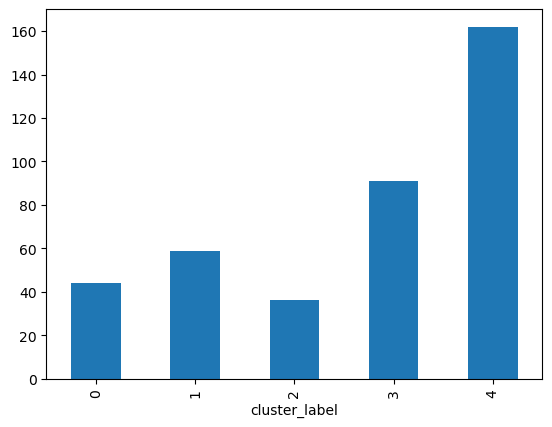

In [311]:
final_model[final_model['cluster_label'] != -1]['cluster_label'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar')

In [279]:
not_clustered.shape #confirms 37 outlets that didn't fall into a cluster/labelled as noise points

(37, 6)

### At a high level, what are the characteristics of each cluster?

##### Averages across clusters

In [325]:
cluster_insights = (final_model
                   .groupby("cluster_label")[["bias_score", "agree_ratio_log", "total_votes_log", "cluster_prob"]]
                   .agg("mean")
                   .reset_index())
cluster_insights

,cluster_label,bias_score,agree_ratio_log,total_votes_log,cluster_prob
0,-1,0.374529,0.352524,0.692447,0.000000
1,0,1.830024,0.910729,0.327729,0.919909
2,1,-1.535808,1.171713,0.243758,0.792094
3,2,0.988566,-0.251254,-0.265169,0.828556
4,3,-0.694350,-0.265319,0.190304,0.479057
5,4,0.147108,-0.549737,-0.383913,0.861736


In [285]:
final_model.describe()

,bias_score,agree_ratio_log,total_votes_log,cluster_label,cluster_prob
count,4.290000e+02,4.290000e+02,4.290000e+02,429.000000,429.000000
mean,-2.484415e-17,-6.625107e-17,-1.656277e-17,2.365967,0.699844
std,1.001168e+00,1.001168e+00,1.001168e+00,1.708652,0.327826
min,-1.535808e+00,-2.732246e+00,-3.369747e+00,-1.000000,0.000000
25%,-6.943499e-01,-6.057294e-01,-6.619696e-01,1.000000,0.461245
50%,1.471080e-01,-1.421582e-01,-2.633762e-02,3.000000,0.804194
75%,1.471080e-01,6.113131e-01,4.596135e-01,4.000000,1.000000
max,1.830024e+00,3.353131e+00,2.807222e+00,4.000000,1.000000


### 3 most typical outlets within each cluster

In [337]:
most_typical = (
    final_model[final_model['cluster_label'] != -1]
    .sort_values(['cluster_prob', 'agree_ratio_log'], ascending=False)
    .groupby('cluster_label')
    .head(3)
    [['cluster_label', 'name', 'bias_score', 'agree_ratio_log', 'total_votes_log', 'cluster_prob']]
)

most_typical.sort_values("cluster_label")

,cluster_label,name,bias_score,agree_ratio_log,total_votes_log,cluster_prob
261,0,RedState,1.830024,1.610165,0.254985,1.0
5,0,American Greatness,1.830024,1.519089,-0.027070,1.0
330,0,The Daily Signal,1.830024,1.468179,0.027750,1.0
220,1,NewsOne,-1.535808,1.465614,-0.372984,1.0
255,1,Raw Story,-1.535808,1.381987,0.477920,1.0
64,1,Common Dreams,-1.535808,1.362801,-0.756586,1.0
29,2,Boston Herald,0.988566,0.097943,0.213272,1.0
229,2,Orange County Register,0.988566,0.089240,-0.026338,1.0
107,2,Fiscal Times,0.988566,-0.095663,0.335915,1.0
104,3,FAIR,-0.694350,-0.382597,0.263763,1.0


### 3 three most borderline outlets

In [324]:
most_typical = (
    final_model[final_model['cluster_label'] != -1]
    .sort_values('cluster_prob')
    .groupby('cluster_label')
    .head(3)
    [['cluster_label', 'name', 'bias_score', 'agree_ratio_log', 'total_votes_log', 'cluster_prob']]
)

most_typical.sort_values("cluster_label")

,cluster_label,name,bias_score,agree_ratio_log,total_votes_log,cluster_prob
78,0,Daily Mail,1.830024,0.825749,1.638399,0.618813
33,0,Breitbart News,1.830024,2.079240,2.158503,0.655152
337,0,The Federalist,1.830024,1.949228,1.416756,0.709573
105,1,Falls Church News - Press,-1.535808,-0.461405,0.135328,0.534584
42,1,Care2,-1.535808,-0.406472,0.312728,0.548413
349,1,The Juggernaut,-1.535808,0.498471,-1.584490,0.558881
86,2,Deseret News,0.988566,-1.050031,0.755094,0.485508
38,2,Byron Donalds,0.988566,0.449634,-1.323671,0.521235
334,2,The Dispatch,0.988566,0.586059,-0.353180,0.641001
3,3,Al Jazeera,-0.694350,-1.123932,1.436848,0.165244


### 3 largest/most popular outlets

Which 3 outlets had the highest number of total votes within each cluster?

In [310]:
largest = (final_model[final_model["cluster_label"] != -1]
           .sort_values("total_votes_log", ascending=False)
           .groupby("cluster_label")
           .head(3)
           [["cluster_label", "name", "bias_score", "agree_ratio_log", "total_votes_log", "cluster_prob"]]
          )

largest.sort_values("cluster_label")         

,cluster_label,name,bias_score,agree_ratio_log,total_votes_log,cluster_prob
33,0,Breitbart News,1.830024,2.079240,2.158503,0.655152
203,0,National Review,1.830024,1.397258,1.829313,0.804194
78,0,Daily Mail,1.830024,0.825749,1.638399,0.618813
58,1,CNN (Opinion),-1.535808,2.582644,2.046881,0.607102
37,1,BuzzFeed News,-1.535808,1.557440,1.952710,0.568701
199,1,MSNBC,-1.535808,2.272134,1.826602,0.801538
92,2,Drudge Report,0.988566,-0.151125,0.919372,0.650409
86,2,Deseret News,0.988566,-1.050031,0.755094,0.485508
157,2,Judicial Watch,0.988566,-0.455183,0.677073,0.742592
215,3,New York Times (News),-0.694350,-0.899256,2.307997,0.167712


##### Each news outlet is described by 3 different dimensions: political leaning, public agreement with bias label, and popularity/number of voters. We want a simple 2D graph to better understand our clusters

##### PCA looks at these three features and asks which of them cause outlets to differ from each other the most. This feature(s) becomes PC1. In our data, ideological leaning + agreement have the largest spreaad amongst outlets

##### PC2 represents our engagement levels

In [407]:
from sklearn.decomposition import PCA

final_model_clustered = final_model[final_model['cluster_label'] != -1]
X = final_model_clustered[numeric_cols]   # numeric_cols = scaled bias_score, agree_ratio_log, total_votes_log

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

final_model_clustered["PC1"] = pca_components[:, 0]
final_model_clustered["PC1"] = final_model_clustered["PC1"]
final_model_clustered["PC2"] = pca_components[:, 1]

/var/folders/q6/5f0g3wq12rb01y9j0hw2f1d00000gn/T/ipykernel_6007/1102096380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_model_clustered["PC1"] = pca_components[:, 0]
/var/folders/q6/5f0g3wq12rb01y9j0hw2f1d00000gn/T/ipykernel_6007/1102096380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_model_clustered["PC1"] = final_model_clustered["PC1"]
/var/folders/q6/5f0g3wq12rb01y9j0hw2f1d00000gn/T/ipykernel_6007/1102096380.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

## Cluster 0: 

##### outlets that AllSides described as having a "right" bias

##### majority of the public agrees with the bias label

##### relatively high engagement (using total_votes as a proxy)

##### outlets in this cluster show very strong belonging (average cluster_prob of 0.92)
## Cluster 1: 

##### outlets that AllSides described as having a "left" bias

##### majority of the public agrees with the bias label (strongest across all clusters)

##### relatively high engagement

##### outlets in this cluster show very strong belonging (average cluster_prob of 0.79)
## Cluster 2: 

##### outlets that AllSides described as having a "right-leaning" bias

##### voters tends to slightly disagree on the bias label

##### engagement is lower than clusters 0 and 1

##### outlets in this cluster show very strong belonging (average cluster_prob of 0.82)
## Cluster 3: 

##### outlets that are slightly left of center

##### slightly more voters disagree than agree with bias label

##### average level of engagement

##### might have a higher number of outlets that don't fit the profile of a typical outlet in that cluster (average cluster_prob of 0.48)
## Cluster 4: 
##### Centrist/very slightly right of center

##### has the highest level of disagreement about bias label across clusters

##### lower engagement on average

##### outlets in this cluster show very strong belonging (average cluster_prob of 0.86)

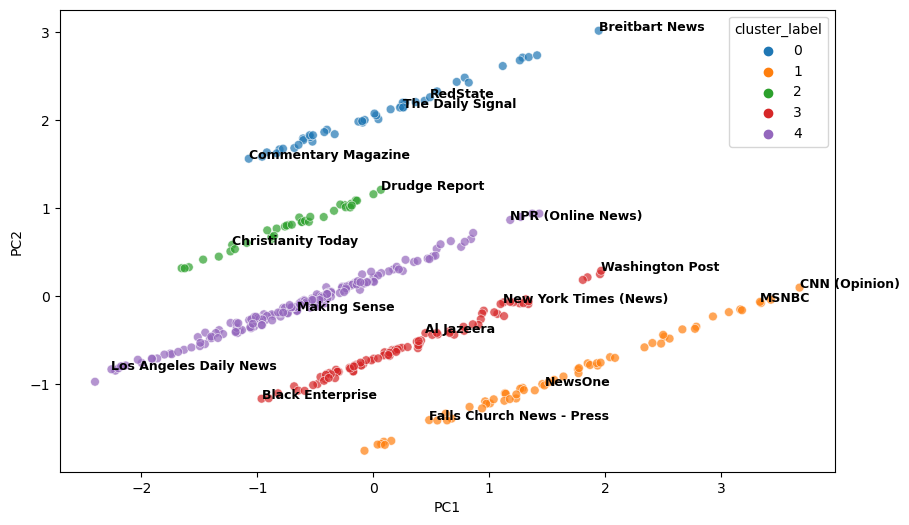

In [408]:
outlets_to_label = [
    "CNN (Opinion)",
    "Breitbart News",
    "NewsOne",
    "RedState",
    "The Daily Signal",
    "Falls Church News - Press",
    "Christianity Today",
    "Black Enterprise",
    "Commentary Magazine",
    "Making Sense",
    "Al Jazeera",
    "MSNBC",
    "Drudge Report",
    "Los Angeles Daily News",
    "New York Times (News)",
    "Washington Post",
    "NPR (Online News)"
]

label_df = final_model_clustered[final_model_clustered["name"].isin(outlets_to_label)]

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=final_model_clustered,
    x="PC1",
    y="PC2",
    hue="cluster_label",
    palette="tab10",
    s=40,
    alpha=0.7
)

for _, row in label_df.iterrows():
    plt.text(
        row["PC1"], 
        row["PC2"], 
        row["name"], 
        fontsize=9, 
        fontweight='bold'
    )

In [381]:
unique_bias_table = (
    final_model_clustered
    .groupby("cluster_label")["bias_score"]
    .nunique()
    .reset_index()
    .rename(columns={"bias_score": "unique_bias_scores"})
)

unique_bias_table

,cluster_label,unique_bias_scores
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


### Each cluster contains only one ideology, so the main factors separating outlets horizontally are the degree to which the public agrees with their bias label. As agreement ratio increases, so does PC1. 

### Clusters 0 (orange) and 1 (green) start out further to the right on the chart because they have higher agreement on average

###  These two clusters also show more internal spread in their agreement levels. The other clusters appear to be more dense. 

### PCA stacks diagonals vertically based on differences in the average combination of: ideological position, public agreement ratio, engagement (total_votes_log)